In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
data_landscape = pd.read_csv('Data/DataLandscape.csv')

In [3]:
data_landscape

,Provider,Payment_Model,Quality_of_data,Depth_of_data,Accessibility_of_data,Price,Access,Audience,League_data,Player_data,Event_data_basic,Event_data_detailed,Performance_data,Injury_data,Insights
0,Who Scored?,Free,7,5,2,1,Web,Casual,Yes,Yes,No,No,No,No,No
1,American Soccer Analytics,Free,6,5,6,1,Export,Analyst,Yes,Yes,No,No,No,No,Maybe
2,Football-Data.co.uk,Free,7,3,4,1,Export,Betting,Yes,No,No,No,No,No,No
3,Footy Stats,Freemium,7,4,8,6,Export & API,Analyst,Yes,Yes,Yes,No,No,No,No
4,Injuries & Suspensions,Freemium,6,5,3,5,Web,Betting,No,No,No,No,No,Yes,No
5,Stats Perform,B2B,9,9,9,9,Export & API,Any,Yes,Yes,Yes,Yes,Maybe,Maybe,Yes
6,Opta Sports Pro,B2B,9,9,9,9,Export & API,Any,Yes,Yes,Yes,Yes,Maybe,Maybe,Yes
7,Kaggle - EA Fifa XX,Free,5,4,6,1,Export,Casual,No,Yes,No,No,No,No,No
8,Kaggle - European Soccer,Free,5,3,6,1,Export,Casual,Yes,No,No,No,No,No,No
9,Kaggle - Premier League Results,Free,5,3,6,1,Export,Casual,Yes,No,No,No,No,No,No


In [4]:
def color_no_red_yes_green(value):
  """
  Colors elements in a dateframe
  green if "Yes" and red if
  "No". Does not color NaN
  values.
  """

  if value == "No":
    color = 'red'
  elif value == "Yes":
    color = 'green'
  elif value == "Maybe":
    color = 'orange'
  else:
    color = 'black'

  return 'color: %s' % color

In [16]:
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '10px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '10px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

# Set colormap equal to seaborns light green color palette
cm_green = sns.light_palette("green", as_cmap=True)

# Set colormap equal to seaborns light green color palette
cm_red = sns.light_palette("red", as_cmap=True)

data_landscape_clean = data_landscape.rename(columns = {'Payment_Model' : 'Payment model', 'Quality_of_data' : 'Quality of data', 'Depth_of_data' : 'Depth of data', 'Accessibility_of_data' : 'Accessibility of data', 'League_data':'League data', 'Player_data':'Player data', 
                              'Event_data_basic':'Event data basic', 'Event_data_detailed' : 'Event data detailed', 'Performance_data' : 'Performance data', 'Injury_data' : 'Injury data'}) 

(data_landscape_clean.style
    .applymap(color_no_red_yes_green, subset=['League data','Player data','Event data basic','Event data detailed','Performance data','Injury data','Insights'])
    .background_gradient(cmap=cm_red, subset=['Price'])
    .background_gradient(cmap=cm_green, subset=['Quality of data','Depth of data','Accessibility of data'])
    .set_table_styles(styles)
    .hide_index())

Provider,Payment model,Quality of data,Depth of data,Accessibility of data,Price,Access,Audience,League data,Player data,Event data basic,Event data detailed,Performance data,Injury data,Insights
Who Scored?,Free,7,5,2,1,Web,Casual,Yes,Yes,No,No,No,No,No
American Soccer Analytics,Free,6,5,6,1,Export,Analyst,Yes,Yes,No,No,No,No,Maybe
Football-Data.co.uk,Free,7,3,4,1,Export,Betting,Yes,No,No,No,No,No,No
Footy Stats,Freemium,7,4,8,6,Export & API,Analyst,Yes,Yes,Yes,No,No,No,No
Injuries & Suspensions,Freemium,6,5,3,5,Web,Betting,No,No,No,No,No,Yes,No
Stats Perform,B2B,9,9,9,9,Export & API,Any,Yes,Yes,Yes,Yes,Maybe,Maybe,Yes
Opta Sports Pro,B2B,9,9,9,9,Export & API,Any,Yes,Yes,Yes,Yes,Maybe,Maybe,Yes
Kaggle - EA Fifa XX,Free,5,4,6,1,Export,Casual,No,Yes,No,No,No,No,No
Kaggle - European Soccer,Free,5,3,6,1,Export,Casual,Yes,No,No,No,No,No,No
Kaggle - Premier League Results,Free,5,3,6,1,Export,Casual,Yes,No,No,No,No,No,No


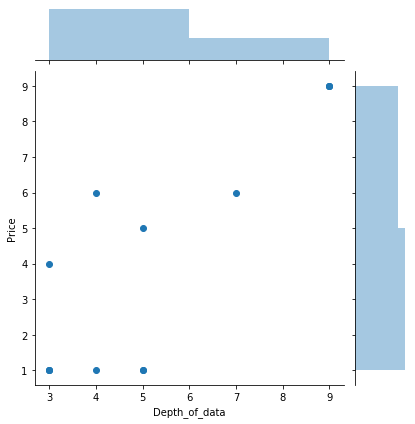

In [18]:
sns.jointplot(x='Depth_of_data', y='Price', data=data_landscape)

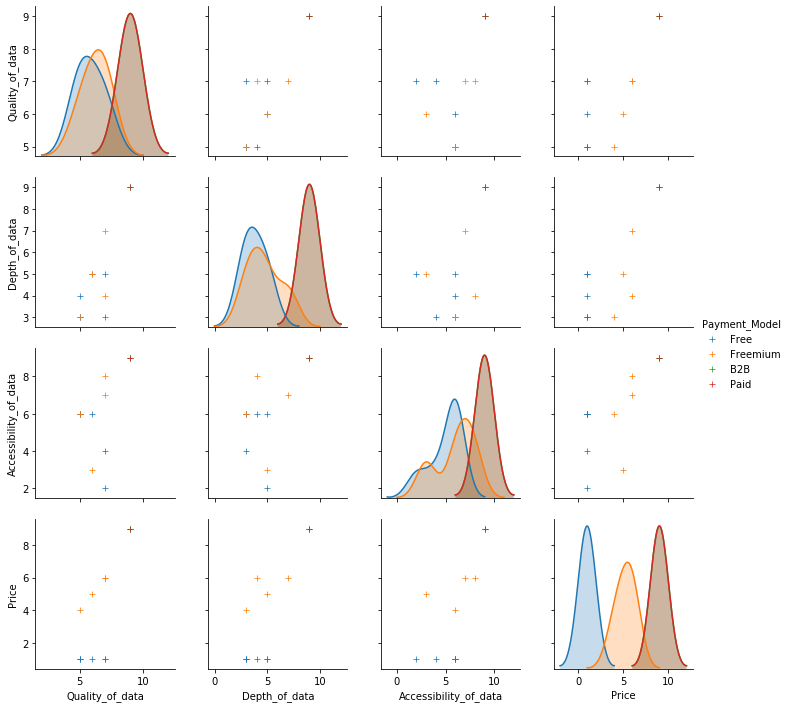

In [44]:
sns.pairplot(data_landscape, hue='Payment_Model', diag_kws=dict(bw=1), markers="+", kind="scatter")

In [19]:
corr = data_landscape.corr()
corr

,Quality_of_data,Depth_of_data,Accessibility_of_data,Price
Quality_of_data,1.000000,0.881994,0.526321,0.804199
Depth_of_data,0.881994,1.000000,0.606788,0.846631
Accessibility_of_data,0.526321,0.606788,1.000000,0.719209
Price,0.804199,0.846631,0.719209,1.000000


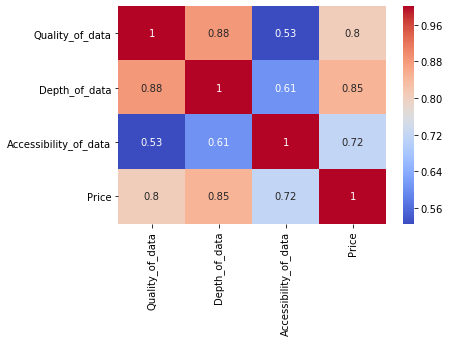

In [53]:
sns.heatmap(corr, annot=True, cmap='coolwarm')